In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/normalized_TSLA_historical_data.csv")

In [4]:
TSLA_df = forecaster._load_data()

In [5]:
forecaster.split_data()

In [6]:
xs, ys = forecaster.create_sequences(TSLA_df, 90)

In [7]:
forecaster.train_arima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6752.240, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6760.377, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6760.487, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6752.041, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6758.440, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6758.519, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6756.737, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6759.888, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.319 seconds


In [8]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-5448.786, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-6070.317, Time=0.76 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=3.72 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-5466.027, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-6302.368, Time=1.31 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=5.86 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-6292.092, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-6302.207, Time=1.55 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-6300.977, Time=2.78 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-6303.002, Time=1.05 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=-6072.185, Time=0.88 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=inf, Time=4.34 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=inf, Time=4.76 sec
 ARIMA(0,1,2)(2,1,0)[5]             : AIC=-6301.3

In [9]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.1722 - val_loss: 0.9540
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0096 - val_loss: 1.0409
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0076 - val_loss: 0.0838
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0070 - val_loss: 0.1558
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0071 - val_loss: 0.1638
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0059 - val_loss: 0.0658
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0057 - val_loss: 0.0651
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0057 - val_loss: 0.0581
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0055 - val_loss: 0.0521
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0053 - val_loss: 0.0478
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0055 - val_loss: 0.0568
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0

In [10]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [11]:
forecaster.evaluate_models()

Shape of test_data for ARIMA: (403,)
Shape of predictions for ARIMA: (403,)
Shape of test_data for SARIMA: (403,)
Shape of predictions for SARIMA: (403,)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shape of test_data for LSTM: (403,)
Shape of predictions for LSTM: (403,)


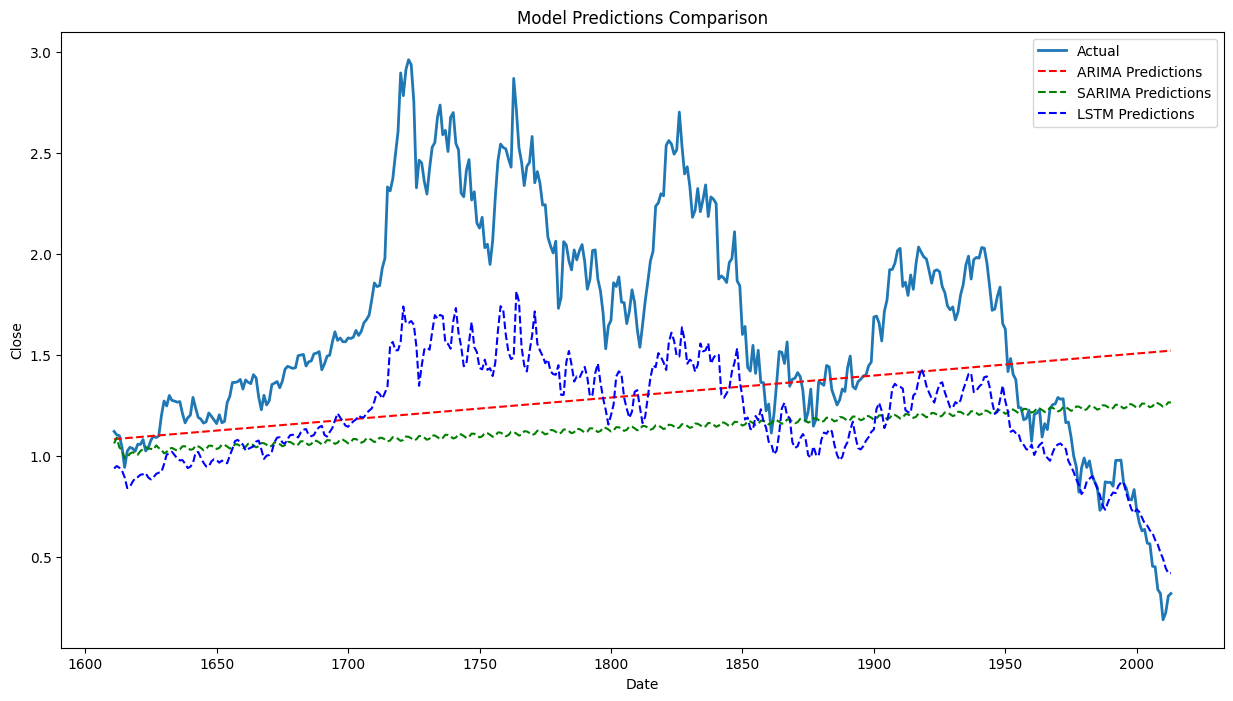

In [12]:
forecaster.plot_results()

In [13]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━

{'LSTM': [0.42720908,
  0.46462506,
  0.5058294,
  0.54458785,
  0.5760826,
  0.5975796,
  0.6082143,
  0.6088455,
  0.6016244,
  0.5893954,
  0.5750458,
  0.56102127,
  0.5490616,
  0.54015714,
  0.534616,
  0.5322167,
  0.53243005,
  0.5345662,
  0.53789836,
  0.54175603,
  0.5455942,
  0.549021,
  0.5518084,
  0.55388063,
  0.5552791,
  0.55612385,
  0.55657953,
  0.55681396,
  0.5569761,
  0.5571809]}